# Keras

In [5]:
import keras

## Keras is perhaps the easiest way to train deep neural networks from scratch. What are deep Neural Networks and how do they work?

Watch this series. 3Blue1Brown might be the best mathematics visualizer and explainer on the internet, for mathematicians and non-mathematicians alike:

https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi


# What does the dataset look like?

In [ ]:
from keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
import matplotlib.pyplot as plt

In [13]:
x_train.shape

(60000, 28, 28, 1)

60K images, that are 28 x 28 in size, with one value per pixel (black/white, as opposed to red/blue/green)

In [16]:
x_train[0].shape

(28, 28, 1)

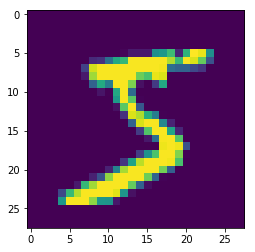

In [27]:
plt.imshow(x_train[0].reshape(28, 28))
plt.show()

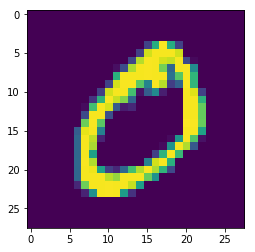

In [28]:
plt.imshow(x_train[1].reshape(28, 28))
plt.show()

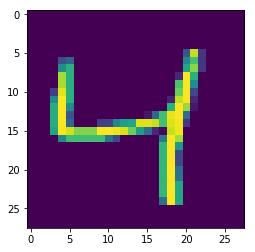

In [29]:
plt.imshow(x_train[2].reshape(28, 28))
plt.show()

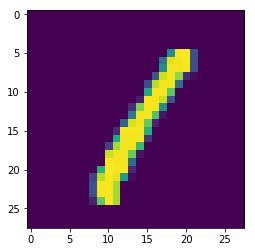

In [30]:
plt.imshow(x_train[3].reshape(28, 28))
plt.show()

# Let's Get Started!

Import Statements

In [ ]:
from __future__ import print_function # For python 2 compatibility, I think
import keras
from keras.datasets import mnist                    # The Mnist digit dataset
from keras.models import Sequential                 # Model Type
from keras.layers import Dense, Dropout, Flatten    # Different Layers
from keras.layers import Conv2D, MaxPooling2D       # 
from keras import backend as K

In [ ]:
batch_size = 256    # this many images will pass through the model at a time
num_classes = 10    # There are 10 different digits
epochs = 2          # this is the number of times the DNN model will pass through the entire dataset

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Images receive a score from 0 to 255 for each pixel. We're dividing by 255 to fit those numbers between 0 and 1

In [ ]:
x_train = x_train.astype('float32') # just some type conversion
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Right below we're converting digit classifications from

```[4, 1, 2] ```

to 

    [0 0 0 0 1 ...
    [0 1 0 0 0 ...
    [0 0 1 0 0 ...
    
    
It's just much easier for the computer to model the data as independent categories than it is for the computer to model the data as lying on a gradient scale. 


After all, a 4 doesn't look more like a 5 than a 9 does, simply because 4 and 5 are closer to each other on the number line.

In [ ]:
# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

What does the code below do?

It doesn't train the model. Much like we create a class, or a function, we're creating the outline of how data passes through the ```model``` object below.

First we initialize a model with

```model = Sequential()```

Then we ```model.add()``` different layers, which we produce with their respective classes:

    Conv2D()
    
https://en.wikipedia.org/wiki/Kernel_(image_processing)

    MaxPooling2D()
    
https://computersciencewiki.org/index.php/Max-pooling_/_Pooling
    
    Dropout()
    
https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout
    
    Dense()
    
https://en.wikipedia.org/wiki/Convolutional_neural_network#Fully_connected_layer

(Also explained in 3Blue1Brown's Video

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Don't worry. This will take a while. 

Maybe 5 minutes. Some models can take months. Fortunately, MNIST is a pretty simple dataset in the grand scheme of things

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 51s 849us/step - loss: 0.4659 - acc: 0.8551 - val_loss: 0.0925 - val_acc: 0.9714
Epoch 2/2
60000/60000 [==============================] - 54s 897us/step - loss: 0.1591 - acc: 0.9541 - val_loss: 0.0624 - val_acc: 0.9811
Test loss: 0.06243380711288191
Test accuracy: 0.9811


# Ok. 98% accuracy on data the model has never seen before. But what does that look like?

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Results are below:

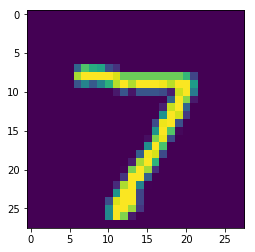

Model Classification: 7
Correct Classification: 7


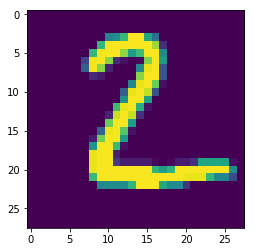

Model Classification: 2
Correct Classification: 2


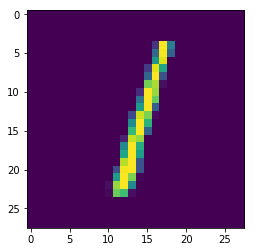

Model Classification: 1
Correct Classification: 1


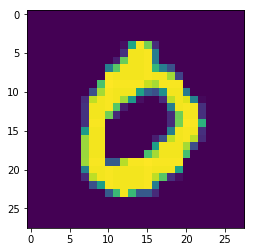

Model Classification: 0
Correct Classification: 0


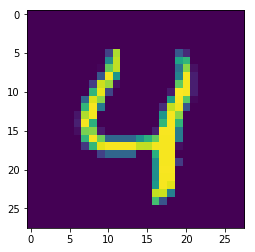

Model Classification: 4
Correct Classification: 4


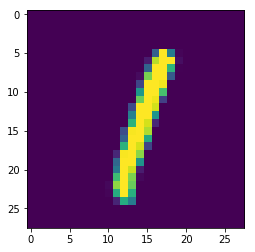

Model Classification: 1
Correct Classification: 1


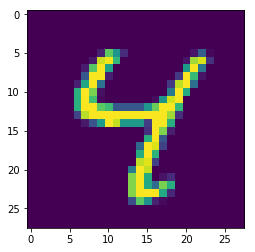

Model Classification: 4
Correct Classification: 4


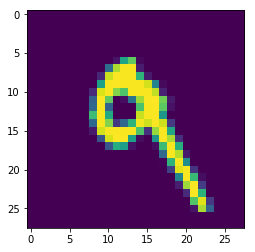

Model Classification: 9
Correct Classification: 9


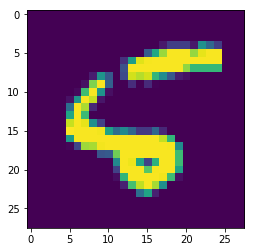

Model Classification: 5
Correct Classification: 5


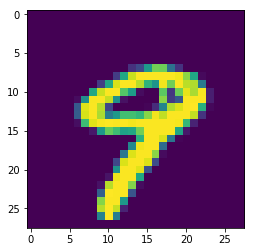

Model Classification: 9
Correct Classification: 9


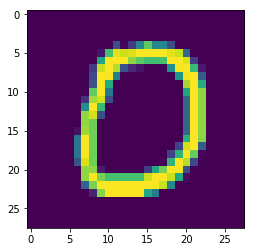

Model Classification: 0
Correct Classification: 0


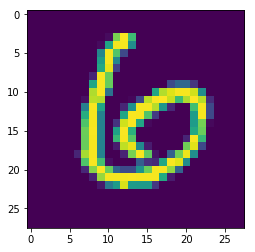

Model Classification: 6
Correct Classification: 6


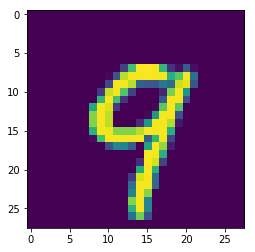

Model Classification: 9
Correct Classification: 9


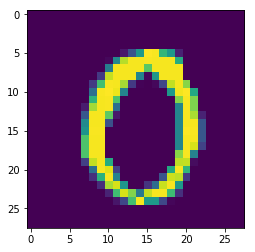

Model Classification: 0
Correct Classification: 0


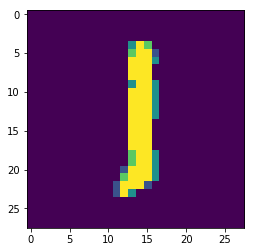

Model Classification: 1
Correct Classification: 1


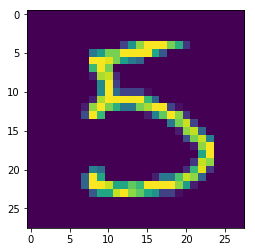

Model Classification: 5
Correct Classification: 5


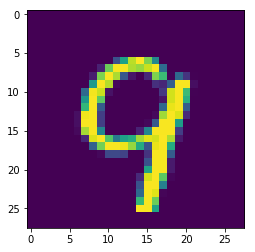

Model Classification: 9
Correct Classification: 9


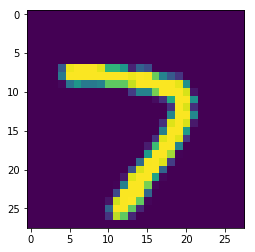

Model Classification: 7
Correct Classification: 7


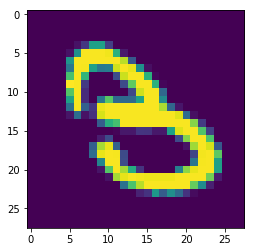

Model Classification: 3
Correct Classification: 3


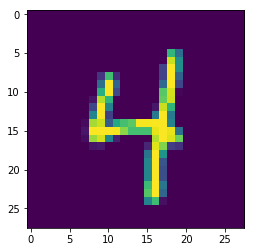

Model Classification: 4
Correct Classification: 4


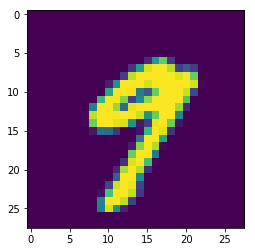

Model Classification: 9
Correct Classification: 9


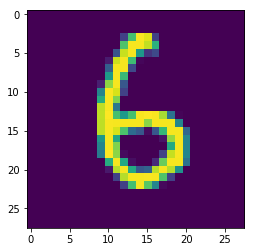

Model Classification: 6
Correct Classification: 6


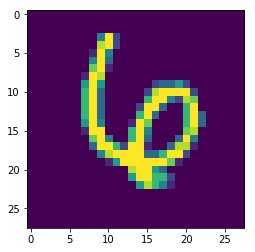

Model Classification: 6
Correct Classification: 6


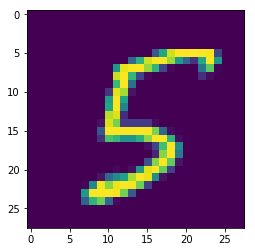

Model Classification: 5
Correct Classification: 5


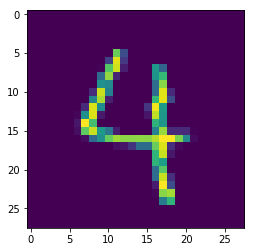

Model Classification: 4
Correct Classification: 4


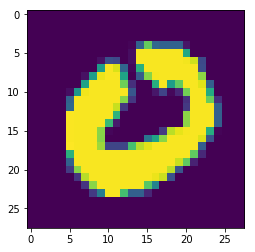

Model Classification: 0
Correct Classification: 0


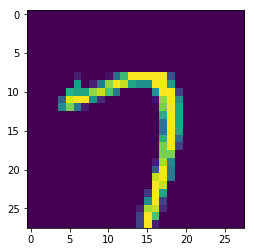

Model Classification: 7
Correct Classification: 7


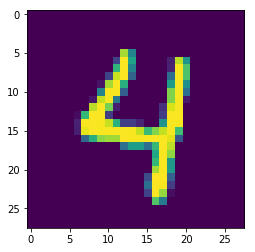

Model Classification: 4
Correct Classification: 4


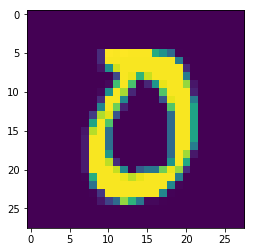

Model Classification: 0
Correct Classification: 0


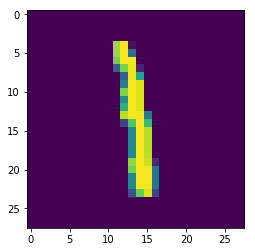

Model Classification: 1
Correct Classification: 1


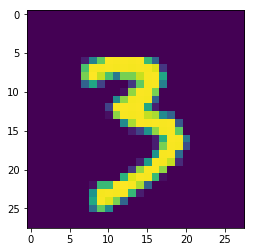

Model Classification: 3
Correct Classification: 3


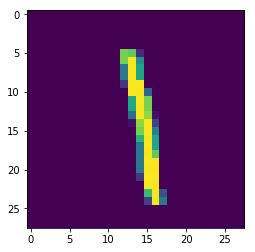

Model Classification: 1
Correct Classification: 1


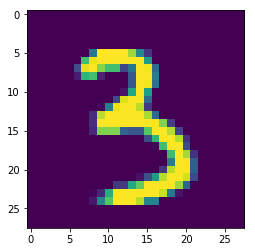

Model Classification: 3
Correct Classification: 3


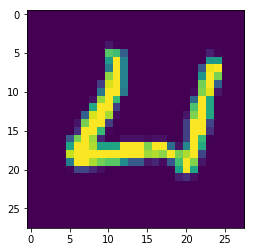

Model Classification: 4
Correct Classification: 4


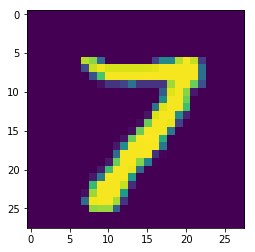

Model Classification: 7
Correct Classification: 7


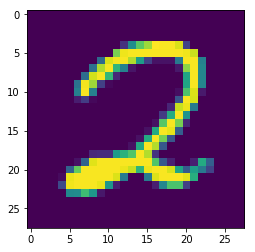

Model Classification: 2
Correct Classification: 2


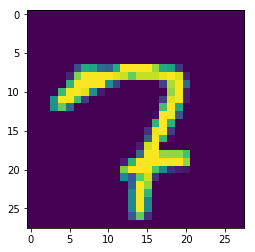

Model Classification: 7
Correct Classification: 7


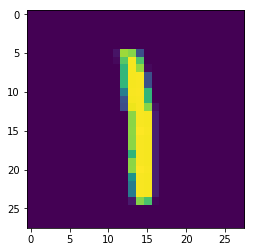

Model Classification: 1
Correct Classification: 1


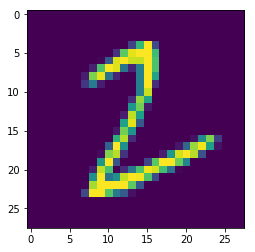

Model Classification: 2
Correct Classification: 2


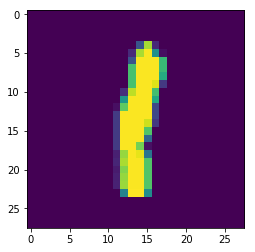

Model Classification: 1
Correct Classification: 1


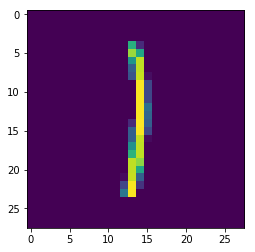

Model Classification: 1
Correct Classification: 1


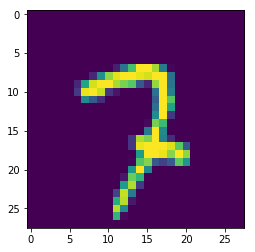

Model Classification: 7
Correct Classification: 7


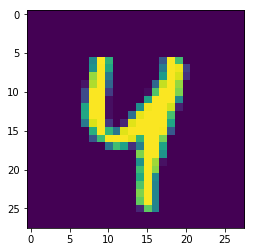

Model Classification: 4
Correct Classification: 4


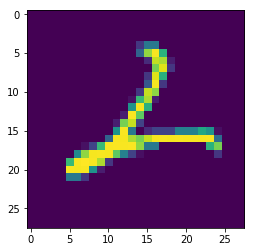

Model Classification: 2
Correct Classification: 2


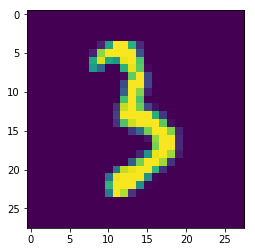

Model Classification: 3
Correct Classification: 3


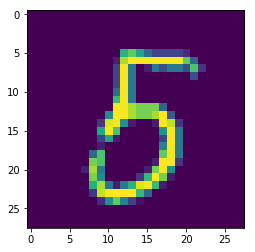

Model Classification: 5
Correct Classification: 5


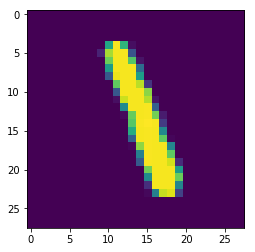

Model Classification: 1
Correct Classification: 1


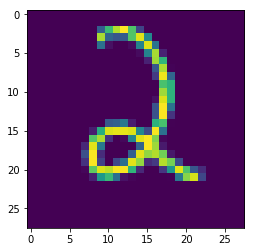

Model Classification: 2
Correct Classification: 2


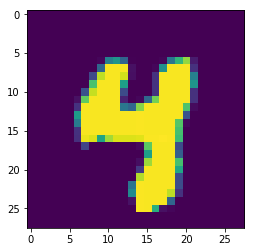

Model Classification: 4
Correct Classification: 4


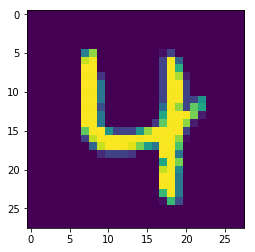

Model Classification: 4
Correct Classification: 4


In [42]:
import numpy as np
n_predictions = 50
predictions = model.predict(x_test[:n_predictions])

for exampleIndex in range(n_predictions):
    plt.imshow(x_test[exampleIndex].reshape(28, 28))
    plt.show()
    x_train[exampleIndex]
    print("Model Classification: " + str(np.where(predictions[exampleIndex]== max(predictions[exampleIndex]))[0][0]))
    print("Correct Classification: " + str(np.where(y_test[exampleIndex] == 1)[0][0]))

# More on Deep Learning

If you really want to put some time into understanding deep neural networks beyond 3Blue1Brown's videos, a practical and semi-technical guide would be the ```cs231n``` course offered at Stanford. It's amazing!

https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv

http://cs231n.github.io/convolutional-networks/



# Once you know how deep neural networks work at a basic level, Using Keras becomes quite easy with some simple tutorials